<a href="https://colab.research.google.com/github/NastyaParnet/evolution/blob/main/Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from random import random
import matplotlib.pyplot as plt
import math

def normalRandom(min, max, skew):
    u = 0
    v = 0
    while u == 0: 
      u = random()
    while v == 0: 
      v = random()
    num = math.sqrt(-2.0 * math.log(u)) * math.cos(2.0 * math.pi * v)
    num = num / 10.0 + 0.5
    if num > 1 or num < 0: 
      num = normalRandom(min, max, skew)
    else:
        num = math.pow(num, skew)
        num *= max - min
        num += min
    return num

def initializePopulation (n, min, max): 
    population = []
    for i in range(n):
        randomValue = random() * (max-min) + min
        population.append(randomValue)
    return population

def generateHeirs(population, n, m, fitnessFunction):
    PTest = []
    for i in range(len(population)):
        SL = 0;
        SR = 0;
        ML = 0;
        MR = 0;
        for j in range(m):
            xji = normalRandom(population[i]-1, population[i]+1, 1)
            if xji < population[i]:
                SL += xji
                ML += 1
            else:
                SR += xji
                MR += 1
        xL = (1 / (ML if ML else 1)) * SL
        xR = (1 / (MR if MR else 1)) * SR

        xH = xL if fitnessFunction(xL) > fitnessFunction(xR) else xR
        PTest.append(xH)
    return PTest

def start(n, m, min, max, numberIteration, fitnessFunction):
    dataSet = []
    population = initializePopulation(n, min, max)
    for i in range(numberIteration):
        bestIndividual = population[0]
        bestValue = fitnessFunction(bestIndividual)
        for i in range(len(population)):
            currentValue = fitnessFunction(population[i])
            if currentValue > bestValue:
                bestIndividual = population[i]
                bestValue = currentValue
        dataSet.append([bestIndividual, bestValue])
        population = generateHeirs(population, n, m, fitnessFunction)
    return dataSet


--- 0.008925914764404297 seconds ---


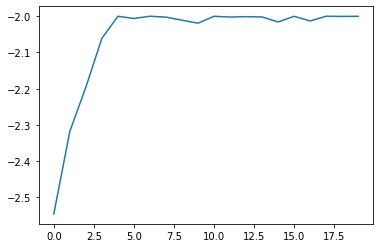

[1.0004546903997653, -2.0000002067433593]


In [ ]:
import time

n = 10
m = 7
min = -10
max = 10
numberIteration = 20
def fitnessFunction (x):
  return -1 * x * x + 2 * x - 3

def funcForSort(elem):
  return elem[1]

start_time = time.time()
dataSet = start(n, m, min, max, numberIteration, fitnessFunction)
print("--- %s seconds ---" % (time.time() - start_time))
plt.plot([x[1] for x in dataSet])
plt.show() 
dataSet.sort(key=funcForSort, reverse=True)
print(dataSet[0])